In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from tqdm import tqdm

### Weakly connected components (BFS search)

In [0]:
def find_all_neighbors(G,nodes):
    '''
        Find all neighbors for a list of nodes
    '''
    all_neighbors = []
    for node in nodes:
        neighbors = list(G.neighbors(node))
        all_neighbors += neighbors
    return all_neighbors


def WCC(G):
    '''
        Find weakly connected components in Graph G
    '''

    # adjacency matrix
    # A = nx.adj_matrix(G)

    # keep record of visited nodes and connected components
    visited_nodes = []
    components = []

    while True:
        # exclude visited nodes
        candidates = list(set(G.nodes()).difference(set(visited_nodes)))

        # all nodes visted stop condition
        if len(candidates) ==0:
            break

        # random choose 1 node
        chozen_node =[np.random.choice(candidates)]
        conn_nodes = chozen_node

        while True:
            neighbors = find_all_neighbors(G,chozen_node)
            visited_nodes += chozen_node
            neighbors = list(set(neighbors).difference(set(visited_nodes)))
            if len(neighbors) == 0: break
            conn_nodes += neighbors
            chozen_node = neighbors

        components.append(conn_nodes)
    return components


[[6, 9, 3, 5, 0, 1, 2, 4, 8, 10, 11, 12], [7]]

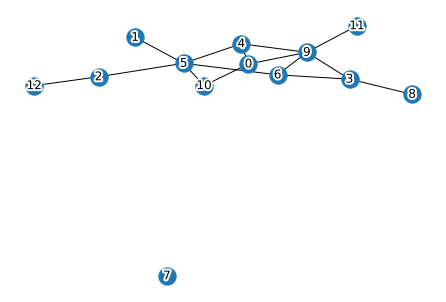

In [3]:
G = nx.erdos_renyi_graph(13,0.15)
plt.xkcd()
nx.draw(G,with_labels = True)
WCC(G)

### Minimum spanning tree (Weighted Undirected Graph)

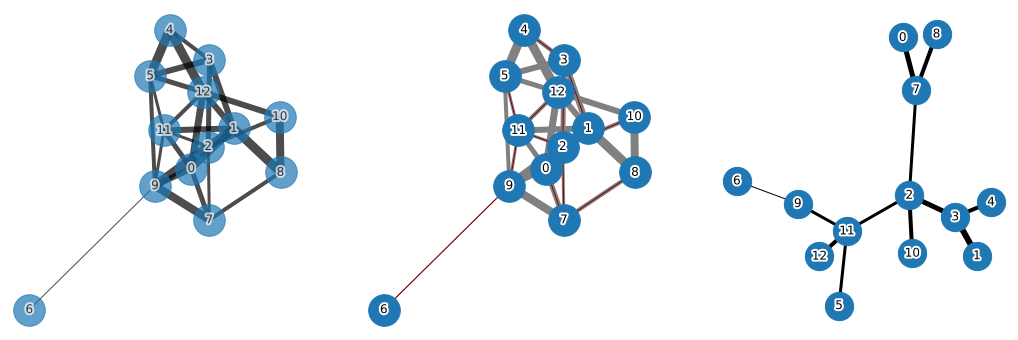

In [4]:
G = nx.erdos_renyi_graph(13,0.3)
weights = []
for u,v,d in G.edges(data = True):
    d['weight'] = np.random.randint(1,10)
    weights.append(d['weight'])

figsize(18,6)
pos = nx.spring_layout(G)
plt.subplot(1,3,1)
nx.draw(G,with_labels = True,width = weights,node_size = 1000,alpha = .7,pos = pos)

T = nx.minimum_spanning_tree(G)
plt.subplot(1,3,2)
nx.draw(G,pos = pos,edge_color = 'gray',width = weights,node_size = 1000,with_labels = True)
nx.draw_networkx_edges(G,pos = pos,edgelist =list(T.edges()),edge_color= 'darkred')

plt.subplot(1,3,3)
nx.draw(T,with_labels = True,width = [d['weight'] for u,v,d in T.edges(data = True)],node_size = 800)
plt.show()

### Walks, Trials, Path and Cycle
- Walks: A sequence of edges that an entity can walk along, without having to jump from one node to another
- A walk can view one node and one edge for many times.
- A trail is a walk where all edges are unique.
- A path is a trial where all edges and nodes are unique.
- A cycle is a closed walk where the first and the last the nodes are the same, can be embedded in a longer walk.

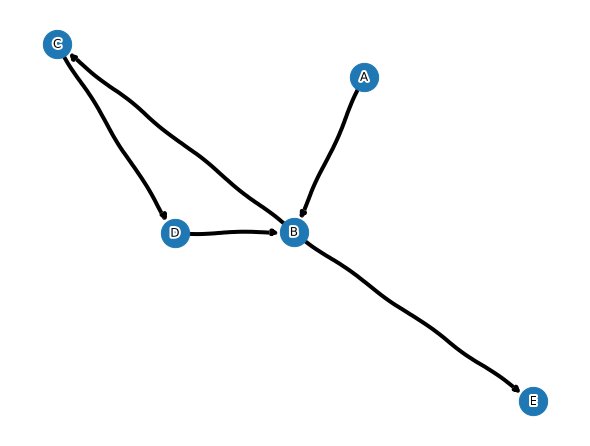

In [5]:
seq = ['A','B','C','D','B','E']
edges = [(seq[i-1],seq[i]) for i in range(1,len(seq))]
G = nx.from_edgelist(edges,nx.DiGraph)
figsize(8,6)
nx.draw(G,with_labels = True,node_size = 800,width = 4)

- ABCDBCDBE  - Walk
- BCDB - Cycle
- ABCDBE - Trial
- ABE - Path

### Rich club coefficient

$Rich\_club\_coefficient = \frac{E_{>k}}{N_{>k}(N_{>k}-1)/2}$    
Connectivity between richest nodes in a graph, given by a level k

In [0]:
def rich_club_coefficient(G,ks = []):
    '''
        Calculate rich club coefficient
        G: networkx graph
        ks: list of node degrees to define a rich club
    '''
    coefs = {}

    if len(ks) ==0:
        ks = set(dict(G.degree()).values())

    degrees = [(n,deg) for n,deg in dict(G.degree()).items()]

    for k in tqdm(ks):
        rich_nodes = [n for n,deg in degrees if deg >= k]

        if len(rich_nodes) <= 1:
            coefs[k] = 0
            continue
        else:
            n_rich_nodes = len(rich_nodes)
            n_rich_edges = len(G.subgraph(rich_nodes).edges())
            rcc = n_rich_edges / ((n_rich_nodes) * (n_rich_nodes - 1)/2 )
            coefs[k] = rcc

    figsize(8,6)
    plt.bar(list(coefs.keys()),list(coefs.values()))
    plt.title("Rich club coefficient")
    plt.xlabel('Node degree')
    plt.ylabel('Rich club coeficient')
    plt.show()
    return coefs

def draw_rich_club_coef(G):
    figsize(15,6)
    plt.subplot(1,2,1)
    nx.draw(G,with_labels = True)
    plt.subplot(1,2,2)
    rich_club_coefficient(G,range(1,12))
    plt.show()

100%|██████████| 11/11 [00:00<00:00, 3195.33it/s]
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


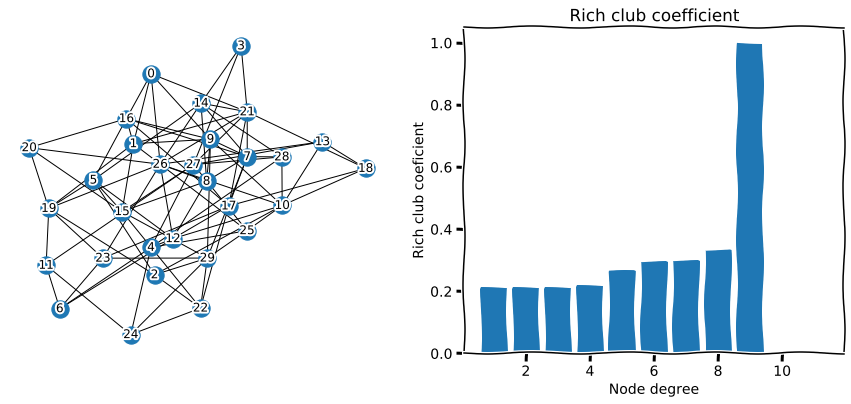

In [7]:
G = nx.erdos_renyi_graph(30,0.2)
draw_rich_club_coef(G)

100%|██████████| 11/11 [00:00<00:00, 5540.03it/s]


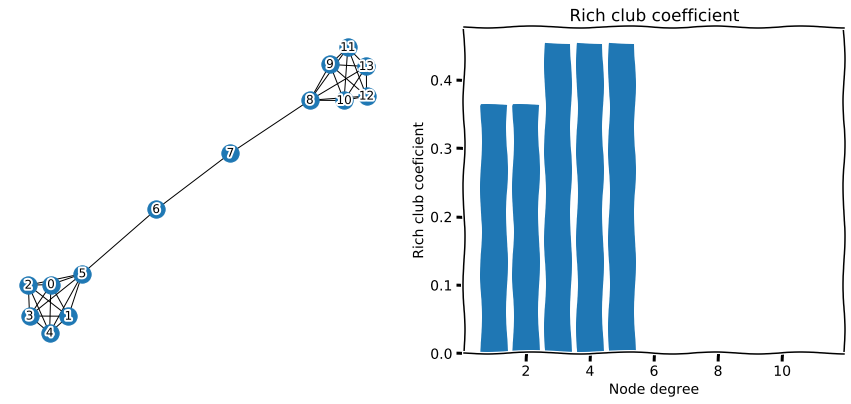

In [8]:
G = nx.barbell_graph(6,2)
draw_rich_club_coef(G)

100%|██████████| 11/11 [00:00<00:00, 3413.54it/s]


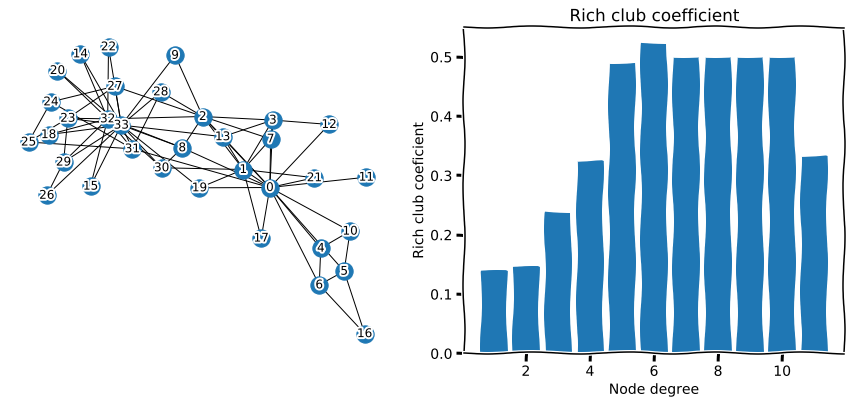

In [9]:
G = nx.karate_club_graph()
draw_rich_club_coef(G)

### K-core

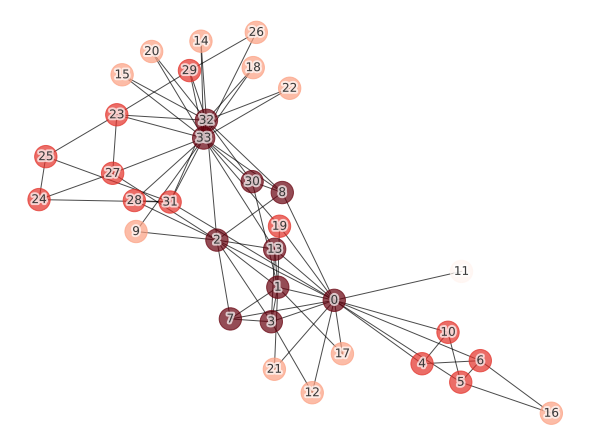

In [10]:
degrees = dict(G.degree())
max_deg = max(degrees.values())
cores = dict(G.nodes(data = True))

for k in range(1,max_deg):
    while True:

        # remove nodes with degree less than or equal to k
        to_remove = [n for n, deg in degrees.items() if deg <= k]
        if len(to_remove) ==0:
            break

        # after removing nodes with degree less than or equal to k
        remaining_nodes = set(degrees.keys()).difference(to_remove)
        degrees = dict(G.subgraph(remaining_nodes).degree())

        if len(to_remove) >0:
            for n in to_remove:
                cores[n] = k
figsize(8,6)
pos = nx.spring_layout(G)
nx.draw(G,pos = pos,node_color = list(cores.values()),cmap = plt.get_cmap('Reds'),alpha = 0.7,node_size = 500,with_labels = True)